In [14]:
# 볼린저 밴드를 이용한 반전 매매기법은 주가가 반전하는 
# 지점을 찾아내 매수 또는 매도하는 기법이다.
# 주가가 하단 밴드를 여러 차례 태그하는 과정에서 강세 지표가 발생하면 
# 매수하고, 주가가 상단 밴드를 여러 차례 태그하는 과정에서 
# 약세 지표가 발생하면 매도한다.

In [15]:
# 일중 강도

# 일중 강도는 거래 범위에서 종가의 위치를 토대로 주식 종목의 자금 흐름을 설명한다. 

In [16]:
import matplotlib.pyplot as plt
import Analyzer

In [21]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('SK하이닉스', '2021-01-01')

end_date is initialized to '2022-02-02'


In [22]:
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

In [23]:
df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']  # ①
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100  # ②
df = df.dropna()

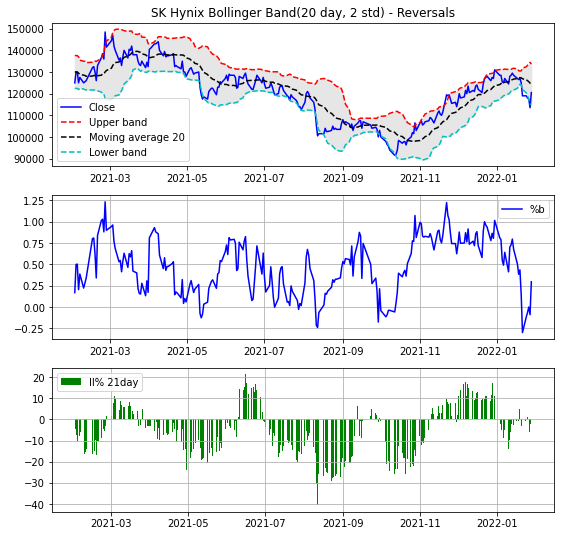

In [26]:
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'b', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)  # ③
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [27]:
# 마지막 차트에서 표시된 일중 강도율은 기고나 블록 거래자의 활동을 추적할 목적으로 
# 만들어진 지표다. 존 볼린저는 일중 강도율을 볼린저 밴드를 확증하는 도구로 사용하는데, 
# 주가가 하단 볼린저 밴드에 닿을 때 일중 강도율이 + 이면 매수하고, 
# 반대로 주가가 상단 볼린저 밴드에 닿을 때 일중 강도율이 -이면 매도하라는 조언한다.

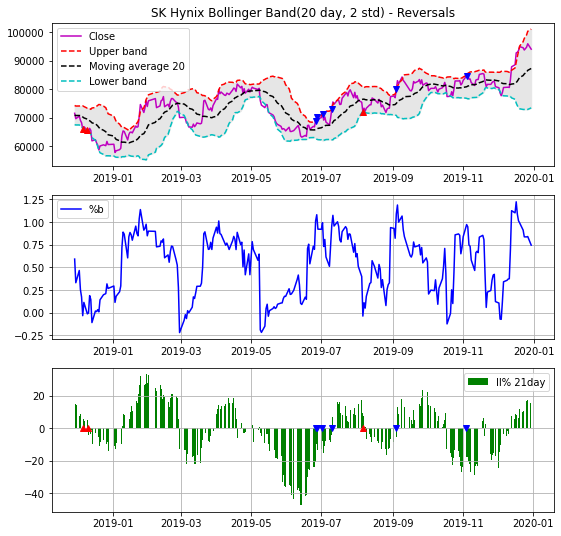

In [34]:
import matplotlib.pyplot as plt
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('SK하이닉스', '2018-11-01', '2020-01-01')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # ⑤
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # ⑥
plt.grid(True)
plt.legend(loc='best')
plt.show()